# Project for Course 5: Automating Port Operations
## By John Hamilton

## Step 1: Build a CNN network to classify the boat

### Import the required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


### Load classified images from disk and split the Train and Validation datasets

In [2]:
batch_size = 32
img_height = 256
img_width = 256

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  'Automating_Port_Operations_dataset',
  validation_split=0.2,
  subset="both",
  shuffle=True,
  seed=43,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

class_names = train_ds.class_names

Found 1162 files belonging to 9 classes.
Using 930 files for training.
Using 232 files for validation.


### Adjust datasets for use in the CNN:
1. Apply normalization to images (x)
2. Change labels to categorical (y)

In [3]:
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), keras.utils.to_categorical(y, num_classes=9)))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), keras.utils.to_categorical(y, num_classes=9)))


### Create the Convolutional Neural Network by specifying its layers

In [4]:
num_classes = 9
model = Sequential([
  layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


c:\Users\jbham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Compile the CNN

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy','precision','recall'])

### Train the model on the training dataset and validate using the validation dataset

In [6]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.2100 - loss: 2.0828 - precision: 0.2449 - recall: 0.0122 - val_accuracy: 0.3017 - val_loss: 1.8207 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.3543 - loss: 1.8005 - precision: 0.3847 - recall: 0.0144 - val_accuracy: 0.3017 - val_loss: 1.8178 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.3399 - loss: 1.7827 - precision: 0.4343 - recall: 0.0095 - val_accuracy: 0.3017 - val_loss: 1.7951 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.3500 - loss: 1.7524 - precision: 0.3633 - recall: 0.0066 - val_accuracy: 0.2974 - val_loss: 1.7748 - val_precision: 1.0000 - val_recall: 0.0043
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.3554 - loss: 1.7522 - precision: 0.5328 - recall: 0.0396 - val_accurac

### Plot the following:
1. Training vs Validation accuracy
2. Training vs Validation loss

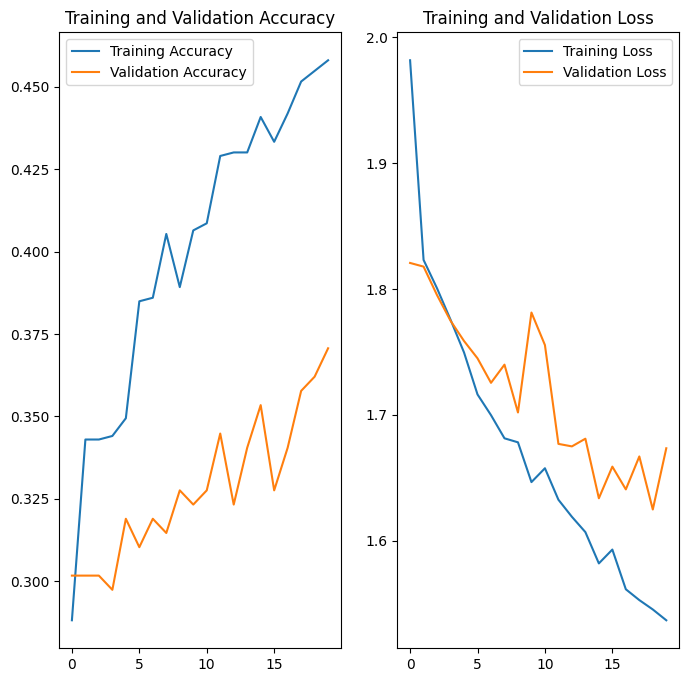

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Test the model on a picture of a boat (random picture downloaded on the internet)

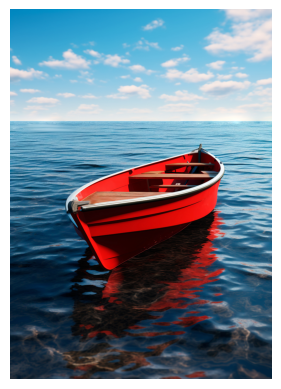

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This image most likely belongs to sailboat with a 25.36 percent confidence.


In [8]:
import matplotlib.image as mpimg

path = 'view-small-boat.jpg'

image = mpimg.imread(path)
plt.imshow(image)
plt.axis('off') 
plt.show()

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


### Evaluate the model and display Validation loss and Validation accuracy

In [9]:
images, labels = next(iter(val_ds))
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(images, labels, batch_size=batch_size)

print(f"Validation Loss: {test_loss}")
print(f"Validation Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3750 - loss: 1.6395 - precision: 1.0000 - recall: 0.0938
Validation Loss: 1.6394543647766113
Validation Accuracy: 0.375


### Print confusion matrix, classification report, and heatmap of confusion matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0 0 0 0 0 0 2]
 [0 1 0 0 2 0 5]
 [0 0 0 0 1 0 1]
 [0 1 0 0 1 0 0]
 [0 0 0 0 2 0 1]
 [0 0 0 0 1 0 0]
 [0 1 0 0 4 0 9]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.12      0.18         8
           2       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           6       0.18      0.67      0.29         3
           7       0.00      0.00      0.00         1
           8       0.50      0.64      0.56        14

    accuracy                           0.38        32
   macro avg       0.15      0.20      0.15        32
weighted avg       0.32      0.38      0.32        32



c:\Users\jbham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jbham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jbham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Axes: >

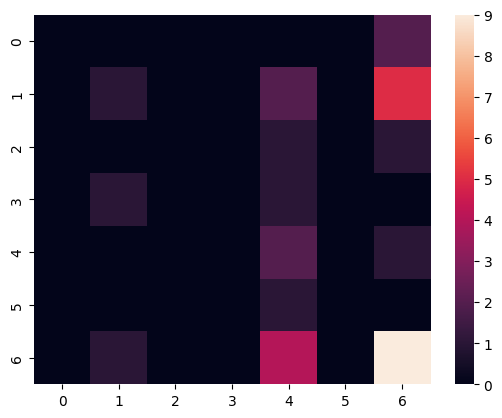

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_actual = np.argmax(labels, axis=1)
y_pred = model.predict(images)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_actual, y_pred_classes)
cr = classification_report(y_actual, y_pred_classes)
print(cm)
print(cr)
sns.heatmap(cm)

## Step 2: Build a lightweight model meant to be deployed to a mobile device

### Load classified images from disk and split the Train and Validation datasets

In [58]:
batch_size = 32
img_height = 256
img_width = 256

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  'Automating_Port_Operations_dataset',
  validation_split=0.3,
  subset="both",
  shuffle=True,
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )


Found 1162 files belonging to 9 classes.
Using 814 files for training.
Using 348 files for validation.


### Adjust datasets for use in the CNN:
1. Apply normalization to images (x)
2. Change labels to categorical (y)

In [59]:
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), keras.utils.to_categorical(y, num_classes=9)))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), keras.utils.to_categorical(y, num_classes=9)))


### Create the Convolutional Neural Network by specifying its layers

In [60]:
from keras.applications.mobilenet_v2 import MobileNetV2

num_classes = 9
model = Sequential([
  MobileNetV2(include_top=False, input_shape=(img_height, img_width, 3)),
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.1),
  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.1),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])


C:\Users\jbham\AppData\Local\Temp\ipykernel_22284\2526748378.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  MobileNetV2(include_top=False, input_shape=(img_height, img_width, 3)),


### Compile the CNN

In [61]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy','precision','recall'])

### Create Early Stopping callback to be passed into model.fit()

In [62]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

### Train the model on the training dataset and validate using the validation dataset

In [63]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[early_stopping]
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 864ms/step - accuracy: 0.4626 - loss: 1.8722 - precision: 0.5982 - recall: 0.3597 - val_accuracy: 0.3420 - val_loss: 3.4822 - val_precision: 0.3758 - val_recall: 0.3391
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 829ms/step - accuracy: 0.8063 - loss: 0.6458 - precision: 0.8701 - recall: 0.7503 - val_accuracy: 0.4684 - val_loss: 2.8589 - val_precision: 0.5211 - val_recall: 0.4253
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 824ms/step - accuracy: 0.8829 - loss: 0.3683 - precision: 0.9166 - recall: 0.8510 - val_accuracy: 0.2586 - val_loss: 2.5692 - val_precision: 0.3043 - val_recall: 0.2213
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 820ms/step - accuracy: 0.9254 - loss: 0.2255 - precision: 0.9563 - recall: 0.9045 - val_accuracy: 0.4368 - val_loss: 2.4492 - val_precision: 0.5125 - val_recall: 0.4138
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 829ms/step - accuracy: 0.9504 - loss: 0.1594 - precision: 0.9662 - recall: 0.9410 - val_accuracy: 0.4626 - val_los

### Plot the following:
1. Training vs Validation accuracy
2. Training vs Validation loss

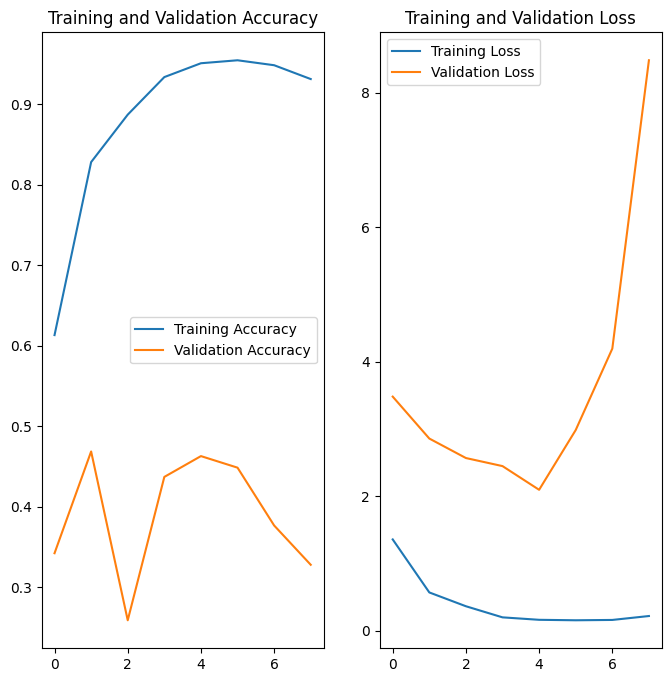

In [64]:
epochs = early_stopping.stopped_epoch+1

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

### Test the model on a picture of a boat (random picture downloaded on the internet)

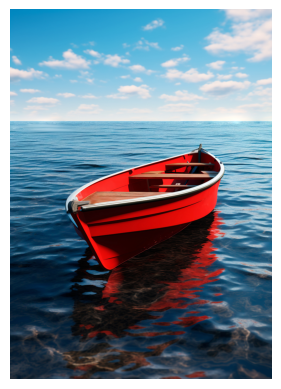

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
This image most likely belongs to sailboat with a 22.16 percent confidence.


In [65]:
import matplotlib.image as mpimg

path = 'view-small-boat.jpg'

image = mpimg.imread(path)
plt.imshow(image)
plt.axis('off') 
plt.show()

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

### Evaluate the model and display Validation loss and Validation accuracy

In [66]:
images, labels = next(iter(val_ds))
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(images, labels, batch_size=batch_size)

print(f"Validation Loss: {test_loss}")
print(f"Validation Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.2812 - loss: 10.8304 - precision: 0.2903 - recall: 0.2812
Validation Loss: 10.830405235290527
Validation Accuracy: 0.28125


## Step 3: Compare Models

- Observations:
    1. Both Training and Validation performed decently in the Step 1 model, though Training did much better than Validation in terms of accuracy and even the Training dataset did not get over 50%.
    2. In the Step 2 model, Training did exceptionally well, although the Validation set did not.  Validation almost reached 50% but for some reason the Validation accuracy kept bouncing up and down and never settled.

- Conclusions: 
    1. The superior performance of the Training and Validation datasets in the Step 2 model makes it the clear winner, which is no surprise, since it starts off using the well-trained MobileNetV2.
    2. However, it is worth noting that the Step 1 model was able to guess the random test image with more confidence, and when the models were evaluated using model.evaluate(), the Step 1 model did slightly better.
    3. Still, the Step 2 model shows superior accuracy by far.